In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,TimeSeriesSplit

df=pd.read_csv("Cleaned_HDFC_stock.csv")
df.head(2)

,Open,High,Low,Volume,result
0,2680.0,2762.0,2666.75,5939812,2722.683838
1,2738.0,2760.0,2719.00,3412213,2646.727539


In [208]:
X=df.drop("result",axis=1)#Independent features
y=df["result"]#Dependent Feature

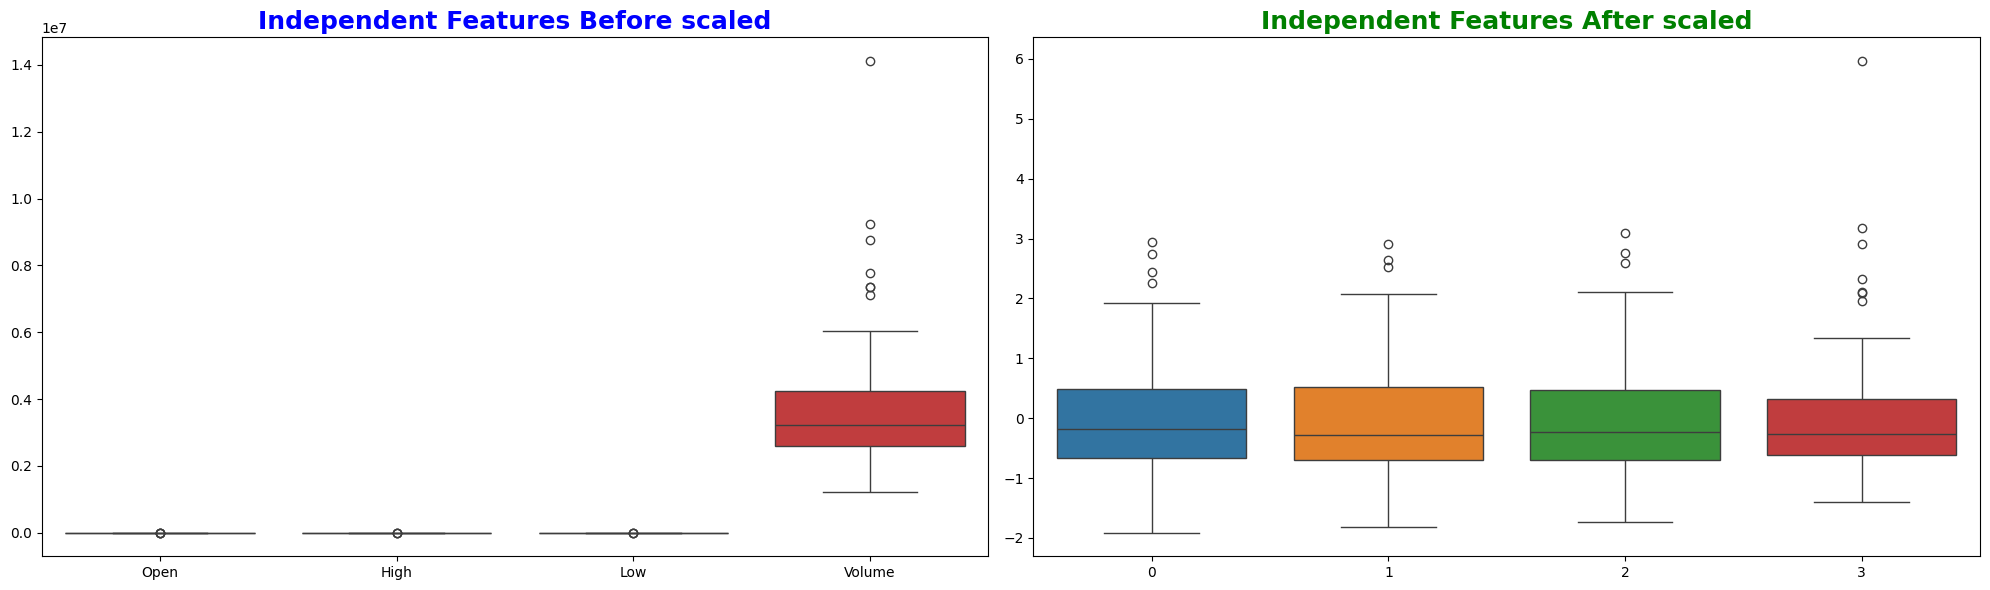

In [209]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.boxplot(X)
plt.title("Independent Features Before scaled",fontsize=18,fontweight="bold",color="b")

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
plt.subplot(1,2,2)
sns.boxplot(X_scaled)
plt.title("Independent Features After scaled",fontsize=18,fontweight="bold",color="g")
plt.tight_layout()

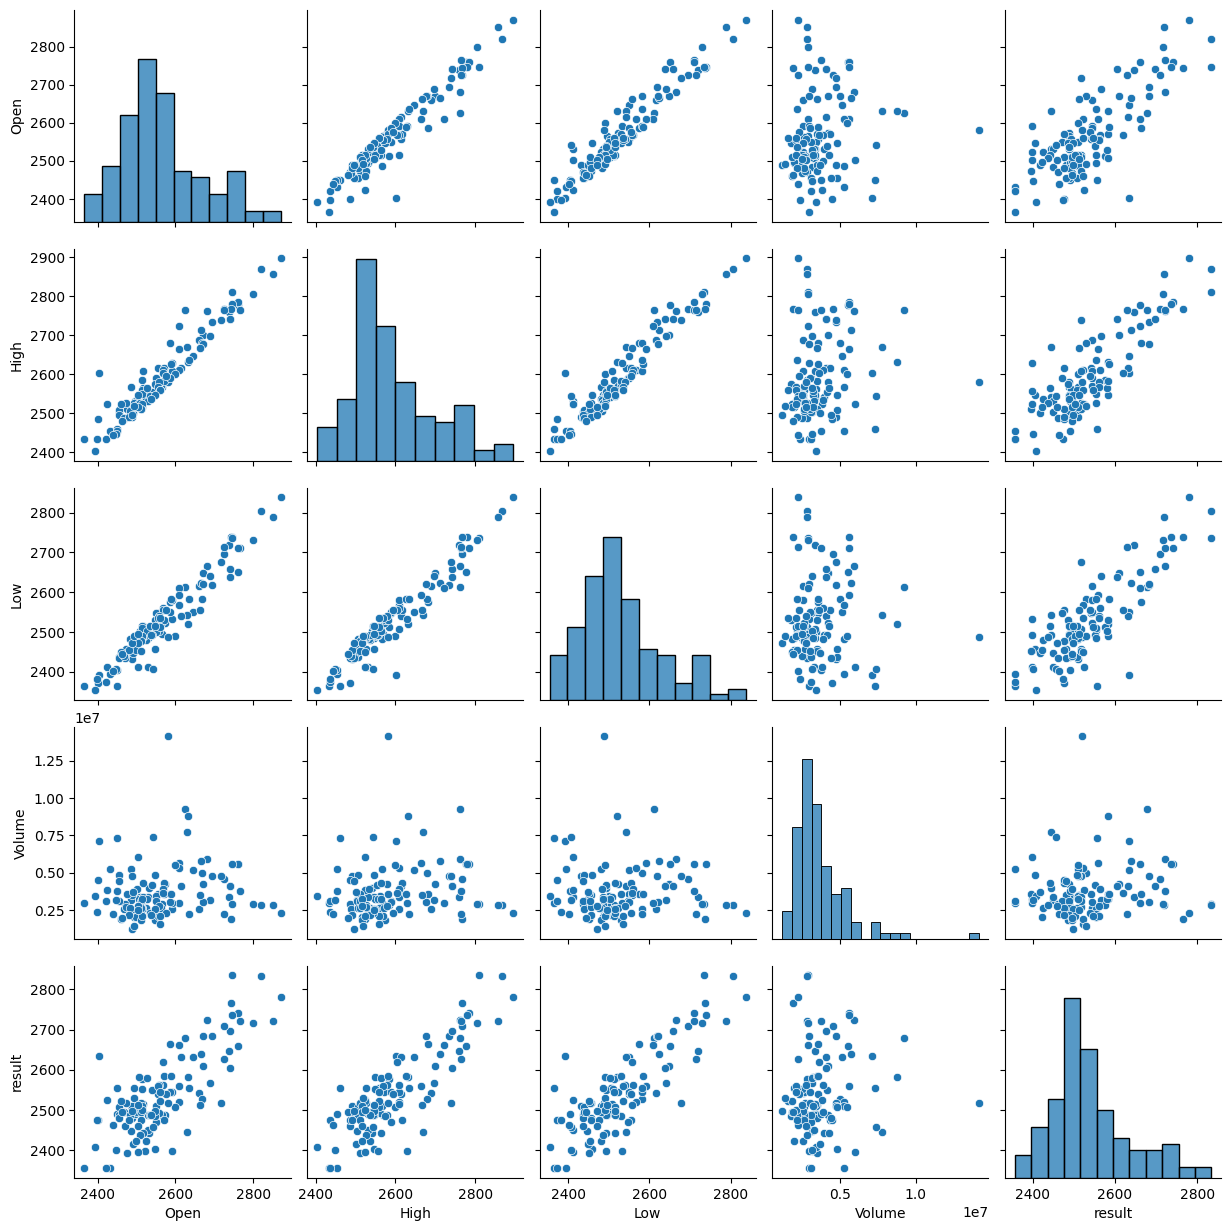

In [247]:
sns.pairplot(df)
plt.show()


#In the above picture we can easily come to conclusion,Due to strong linear correlation  between features, linear models perform well on this dataset.

In [238]:

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42,test_size=0.25)
print("Number of Traning samples",X_train.shape[0])
print("Number of Test samples",X_test.shape[0])


Number of Traning samples 90
Number of Test samples 31


In [239]:
models={"LinearRegression":LinearRegression(),"Ridge":Ridge(),"Lasso":Lasso(),"ElasticNet":ElasticNet()}

model_name=[]
error_train=[]
error_test=[]
r2_train=[]
r2_test=[]
for name,model in models.items():
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    score_train=r2_score(y_train,y_train_pred)
    score_test=r2_score(y_test,y_test_pred)
    model_name.append(name)
    error_train.append(rmse_train)
    error_test.append(rmse_test)
    r2_train.append(score_train)
    r2_test.append(score_test)
    if name=="LinearRegression":
        y_pred=model.predict(X_test)
    
        
    print(f"Model Name:{name}\n")
    print("Root Mean Squared Error of Training ",rmse_train)
    print("R2 score of Traning set",score_train)
    print("-------------------------------\n")
    print("Root Mean Squared Error of Test set",rmse_test)
    print("R2 score of Traning set",score_test)
    print("="*30)

Model Name:LinearRegression

Root Mean Squared Error of Training  51.0570821864153
R2 score of Traning set 0.709905377346843
-------------------------------

Root Mean Squared Error of Test set 56.044318199285684
R2 score of Traning set 0.739464176238066
Model Name:Ridge

Root Mean Squared Error of Training  51.20751366146051
R2 score of Traning set 0.7081934248303632
-------------------------------

Root Mean Squared Error of Test set 56.55955634481708
R2 score of Traning set 0.7346517331153863
Model Name:Lasso

Root Mean Squared Error of Training  51.746876712297436
R2 score of Traning set 0.7020139188417396
-------------------------------

Root Mean Squared Error of Test set 58.72075538554996
R2 score of Traning set 0.7139858401692508
Model Name:ElasticNet

Root Mean Squared Error of Training  54.75995384504866
R2 score of Traning set 0.666301817532303
-------------------------------

Root Mean Squared Error of Test set 64.05806556648454
R2 score of Traning set 0.6596295049412353


In [240]:
result=pd.DataFrame(zip(model_name,r2_train,r2_test,error_train,error_test),columns=["Model Name","R2 Train","R2 Test","Error Train","Error Test"])
result.sort_values(by="R2 Test",ascending=False)

,Model Name,R2 Train,R2 Test,Error Train,Error Test
0,LinearRegression,0.709905,0.739464,51.057082,56.044318
1,Ridge,0.708193,0.734652,51.207514,56.559556
2,Lasso,0.702014,0.713986,51.746877,58.720755
3,ElasticNet,0.666302,0.659630,54.759954,64.058066


In [241]:
pd.DataFrame({"actual":y_test,"predict":y_pred,"abs difference":abs(y_test-y_pred)})

,actual,predict,abs difference
44,2492.783447,2513.059269,20.275822
47,2508.936035,2540.368931,31.432896
4,2543.272461,2616.211453,72.938992
55,2423.714355,2496.223450,72.509095
26,2720.305420,2743.690940,23.385520
64,2469.793457,2552.363285,82.569828
73,2396.611816,2479.996496,83.384680
10,2444.672852,2600.339735,155.666883
40,2576.270996,2550.055522,26.215474
108,2522.899902,2497.821596,25.078306


In [242]:
parameters={"alpha":[0.001,0.0001,0.1,0.5,1,5,10,20,25,30,45,64,81,97,100]}
hyper_tune_model=GridSearchCV(estimator=Ridge(),param_grid=parameters,n_jobs=-1,scoring="neg_root_mean_squared_error")
hyper_tune_model.fit(X_train,y_train)
best_model=hyper_tune_model.best_estimator_
best_model

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",Non

parameters {'alpha': 0.0001, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
r2_score 73.95
Error 56.04


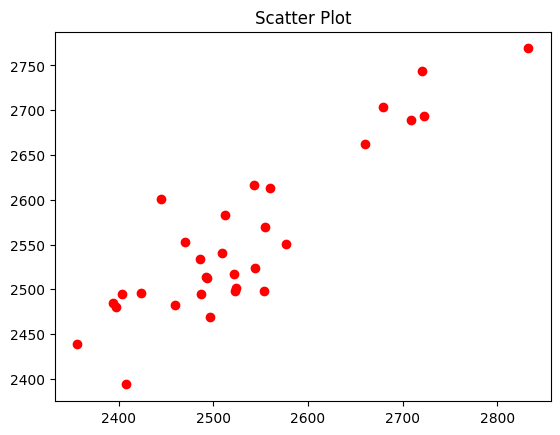

In [251]:
y_pred=best_model.predict(X_test)
score=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("parameters",best_model.get_params())
print("r2_score",round(score*100,2))
print("Error",round(rmse,2))
plt.scatter(y_test,y_pred,color="r")
plt.title("Scatter Plot")
plt.show()

In [ ]:
print("Test set values",y_test.values)
print("Predicted values",y_pred)

Test set values [2492.783447 2508.936035 2543.272461 2423.714355 2720.30542  2469.793457
 2396.611816 2444.672852 2576.270996 2522.899902 2708.612549 2524.097412
 2403.796143 2559.573486 2486.144287 2496.399902 2487.399902 2722.683838
 2544.312988 2521.449951 2394.035156 2491.842285 2660.402588 2553.677246
 2512.552979 2356.280273 2679.082031 2459.399902 2408.106934 2554.5
 2832.77832 ]
Predicted values [2513.05957803 2540.36799672 2616.21129133 2496.22366796 2743.69103136
 2552.36302471 2479.99661454 2600.33947749 2550.05468605 2497.82088075
 2688.77280835 2501.99281756 2494.5576345  2612.97187691 2533.54282094
 2469.02196479 2494.73157131 2693.27595168 2524.09953789 2517.26312424
 2484.39886074 2513.75967815 2661.81677217 2498.60356916 2583.07221275
 2439.26115185 2703.55816207 2483.00937858 2393.69437663 2569.97902824
 2768.97018941]


#model accuracy is not changed after hyper parameter tune

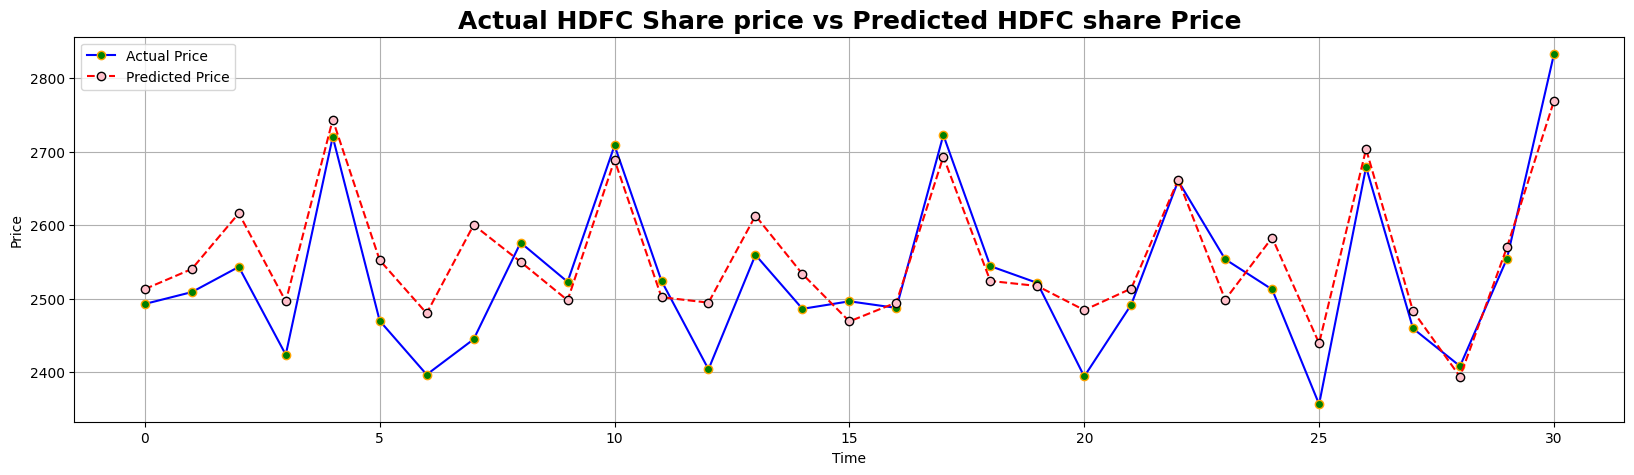

In [269]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values, label="Actual Price", color="blue",marker="o",markerfacecolor="g",markeredgecolor="orange")
plt.plot(y_pred, label="Predicted Price", color="red", linestyle="--",marker="o",markerfacecolor="pink",markeredgecolor="black")
plt.title("Actual HDFC Share price vs Predicted HDFC share Price",fontweight="bold",fontsize=18)
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()
